In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Практика: Множественная линейная регрессия на чистых данных

## Цель работы
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

## Содержание работы
1. Построить предиктивную модель предсказания целевой переменной в зависимости от нескольких факторов (признаков).
2. Загрузить датасет из приложения (файлы с признаками x и целевой переменной y, без заголовков). Вывести первые строки.
3. Сделать количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
4. Построить парную регрессионную модель для целевой переменной и каждого признака, визуализировать линию регрессии и данные, оценить силу связи через коэффициенты.
5. Построить модель множественной линейной регрессии от всех показателей, оценить качество и сделать вывод.

## 1. Загрузка данных

Загружаем данные из файлов 0_x.csv и 0_y.csv, как указано в методичке, с учетом того, что файлы не содержат заголовков:

In [14]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv", header=None)

## 2. Количественное описание датасета

Оценим размер и статистические характеристики данных:

In [15]:
x.shape, y.shape

((387, 5), (387, 1))

# Пояснение:

1. x имеет 387 строк (объектов) и 5 столбцов (признаков).
2. y имеет 387 строк и 1 столбец (целевая переменная).
3. Количество строк совпадает, что важно для обучения модели.

In [16]:
x.describe()

,0,1,2,3,4
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.080231,-0.023369,-0.094194,0.052474,0.067604
std,1.006557,1.008319,1.013547,0.996496,0.964922
min,-2.721942,-3.526587,-2.952847,-3.468134,-2.376103
25%,-0.505726,-0.606748,-0.731435,-0.594637,-0.582224
50%,0.064065,-0.006496,-0.123261,0.022809,-0.027389
75%,0.746176,0.602911,0.534841,0.750923,0.665682
max,3.077357,2.779463,2.959742,2.943178,3.626974


In [17]:
y.describe()

,0
count,387.000000
mean,-2.228924
std,109.762609
min,-317.372654
25%,-81.782754
50%,0.526462
75%,69.249485
max,266.532640


## 3. Парные регрессионные модели

Построим парную регрессию для каждого признака.

Признак 0:
Коэффициент: 22.7811134205866
Свободный член: -4.05666473187296
R²: 0.04364336234689348


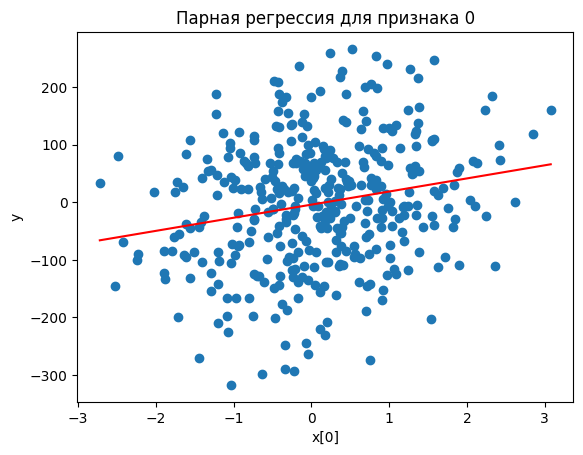

Признак 1:
Коэффициент: 95.52010744785575
Свободный член: 0.003320924502834277
R²: 0.7699743283650629


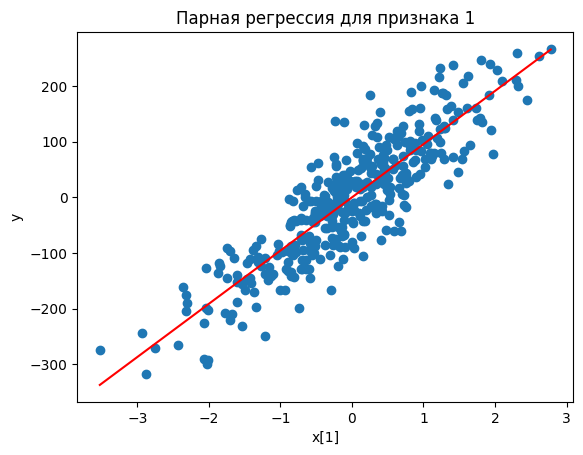

Признак 2:
Коэффициент: 46.94897635119021
Свободный член: 2.1934010808461943
R²: 0.18794528514998887


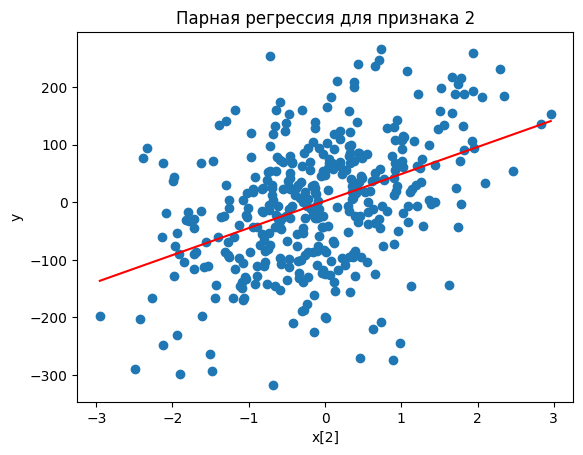

Признак 3:
Коэффициент: 23.998824072824334
Свободный член: -3.488249616549184
R²: 0.047470345664983093


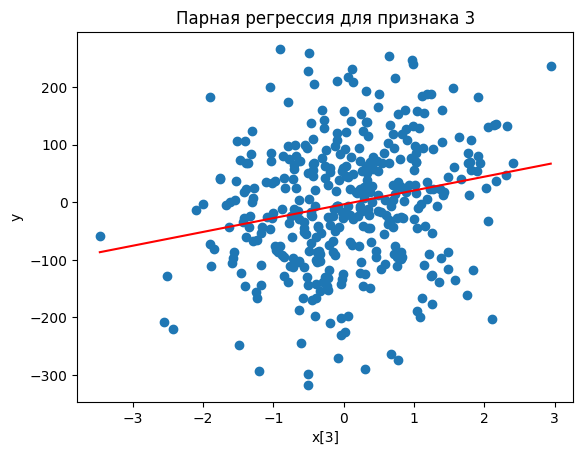

Признак 4:
Коэффициент: 1.4908204197891677
Свободный член: -2.329709071771846
R²: 0.00017176151145947838


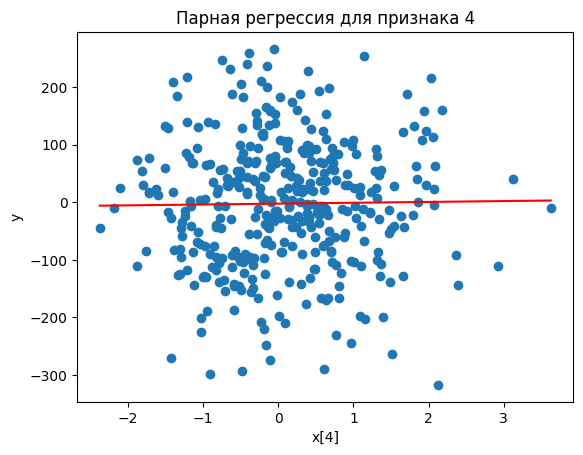

In [18]:
for i in range(5):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    print(f"Признак {i}:")
    print(f"Коэффициент: {binary.coef_[0][0]}")
    print(f"Свободный член: {binary.intercept_[0]}")
    print(f"R²: {binary.score(x[[i]], y)}")
    
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')
    plt.title(f"Парная регрессия для признака {i}")
    plt.xlabel(f"x[{i}]")
    plt.ylabel("y")
    plt.show()

## Пояснение:

1. Для каждого признака создана модель парной регрессии.
2. coef_ — коэффициент наклона линии, показывающий изменение y при изменении признака на 1.
3. intercept_ — свободный член, значение y при нулевых признаках.
4. R² — коэффициент детерминации, показывающий долю объясненной дисперсии (от 0 до 1).
5. Графики показывают точки данных и линию регрессии. Например, для признака 1 (R² ≈ 0.76) точки близки к линии, что указывает на сильную связь, тогда как для признака 4 (R² ≈ 0.001) связь практически отсутствует.

##### R² (коэффициент детерминации) — это показатель, который говорит, насколько хорошо твоя модель регрессии объясняет изменения в целевой переменной y на основе признака x[[i]]. Проще говоря, он показывает, какая часть разброса данных "понята" моделью.

Диапазон значений:
1. R² = 1: Модель идеально предсказывает все значения y. Все точки лежат на линии регрессии.
2. R² = 0: Модель не объясняет ничего лучше, чем просто среднее значение y.
3. R² < 0: Модель хуже среднего значения (это редко, но бывает, если модель совсем плохая).

## 4. Модель множественной линейной регрессии

Построим модель, используя все признаки, и оценим её качество:

Коэффициенты: [15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]
Свободный член: 0.5649835377652344
R²: 0.9922198026415868


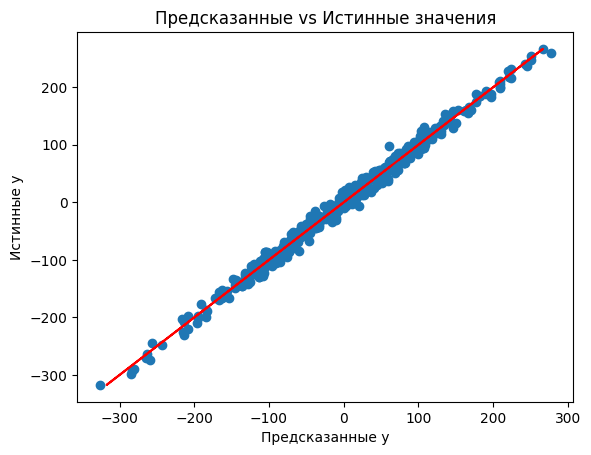

In [19]:
multiple = LinearRegression()
multiple.fit(x, y)
print(f"Коэффициенты: {multiple.coef_[0]}")
print(f"Свободный член: {multiple.intercept_[0]}")
print(f"R²: {multiple.score(x, y)}")

y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
plt.title("Предсказанные vs Истинные значения")
plt.xlabel("Предсказанные y")
plt.ylabel("Истинные y")
plt.show()

## Пояснение:

1. Модель учитывает все 5 признаков одновременно.
2. R² ≈ 0.99 означает, что модель объясняет почти 100% вариации y, что указывает на отличное качество.
3. Коэффициенты показывают вклад каждого признака: например, признак 2 (93.2) имеет наибольшее влияние.
4. График демонстрирует, что предсказанные значения почти идеально совпадают с истинными, подтверждая высокую точность.

## Вывод:
Модель множественной регрессии значительно превосходит парные модели, так как использует всю доступную информацию, что приводит к практически идеальному предсказанию.